### Exploring the Response Variable and Concluding the Initial Exploration

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.style.use('dark_background')
mpl.rcParams['font.size'] = 4

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df['default payment next month'].mean()

0.2217971797179718

In [5]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
lr = LogisticRegression()

In [8]:
lr

LogisticRegression()

In [9]:
lr_model = LogisticRegression(C=1.0,
                             class_weight=None,
                             dual = False,
                             fit_intercept=True,
                              intercept_scaling=1,
                              max_iter=100,
                              multi_class= 'auto',
                              n_jobs= None,
                              penalty = 'l2',
                              random_state = None,
                              solver = 'warn',
                              tol = 0.0001,
                              verbose = 0,
                              warm_start= False)

In [10]:
lr_model

LogisticRegression(solver='warn')

In [11]:
lr_model.C = 0.1
lr_model.solver = 'liblinear'
lr_model

LogisticRegression(C=0.1, solver='liblinear')

In [12]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [13]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
lr_model.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [15]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [16]:
lr_model.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

### Generating synthetic data

In [18]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [19]:
#data for a linear regression

In [20]:
np.random.seed(seed=1)

slope = 0.25
intercept = -1.25

y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

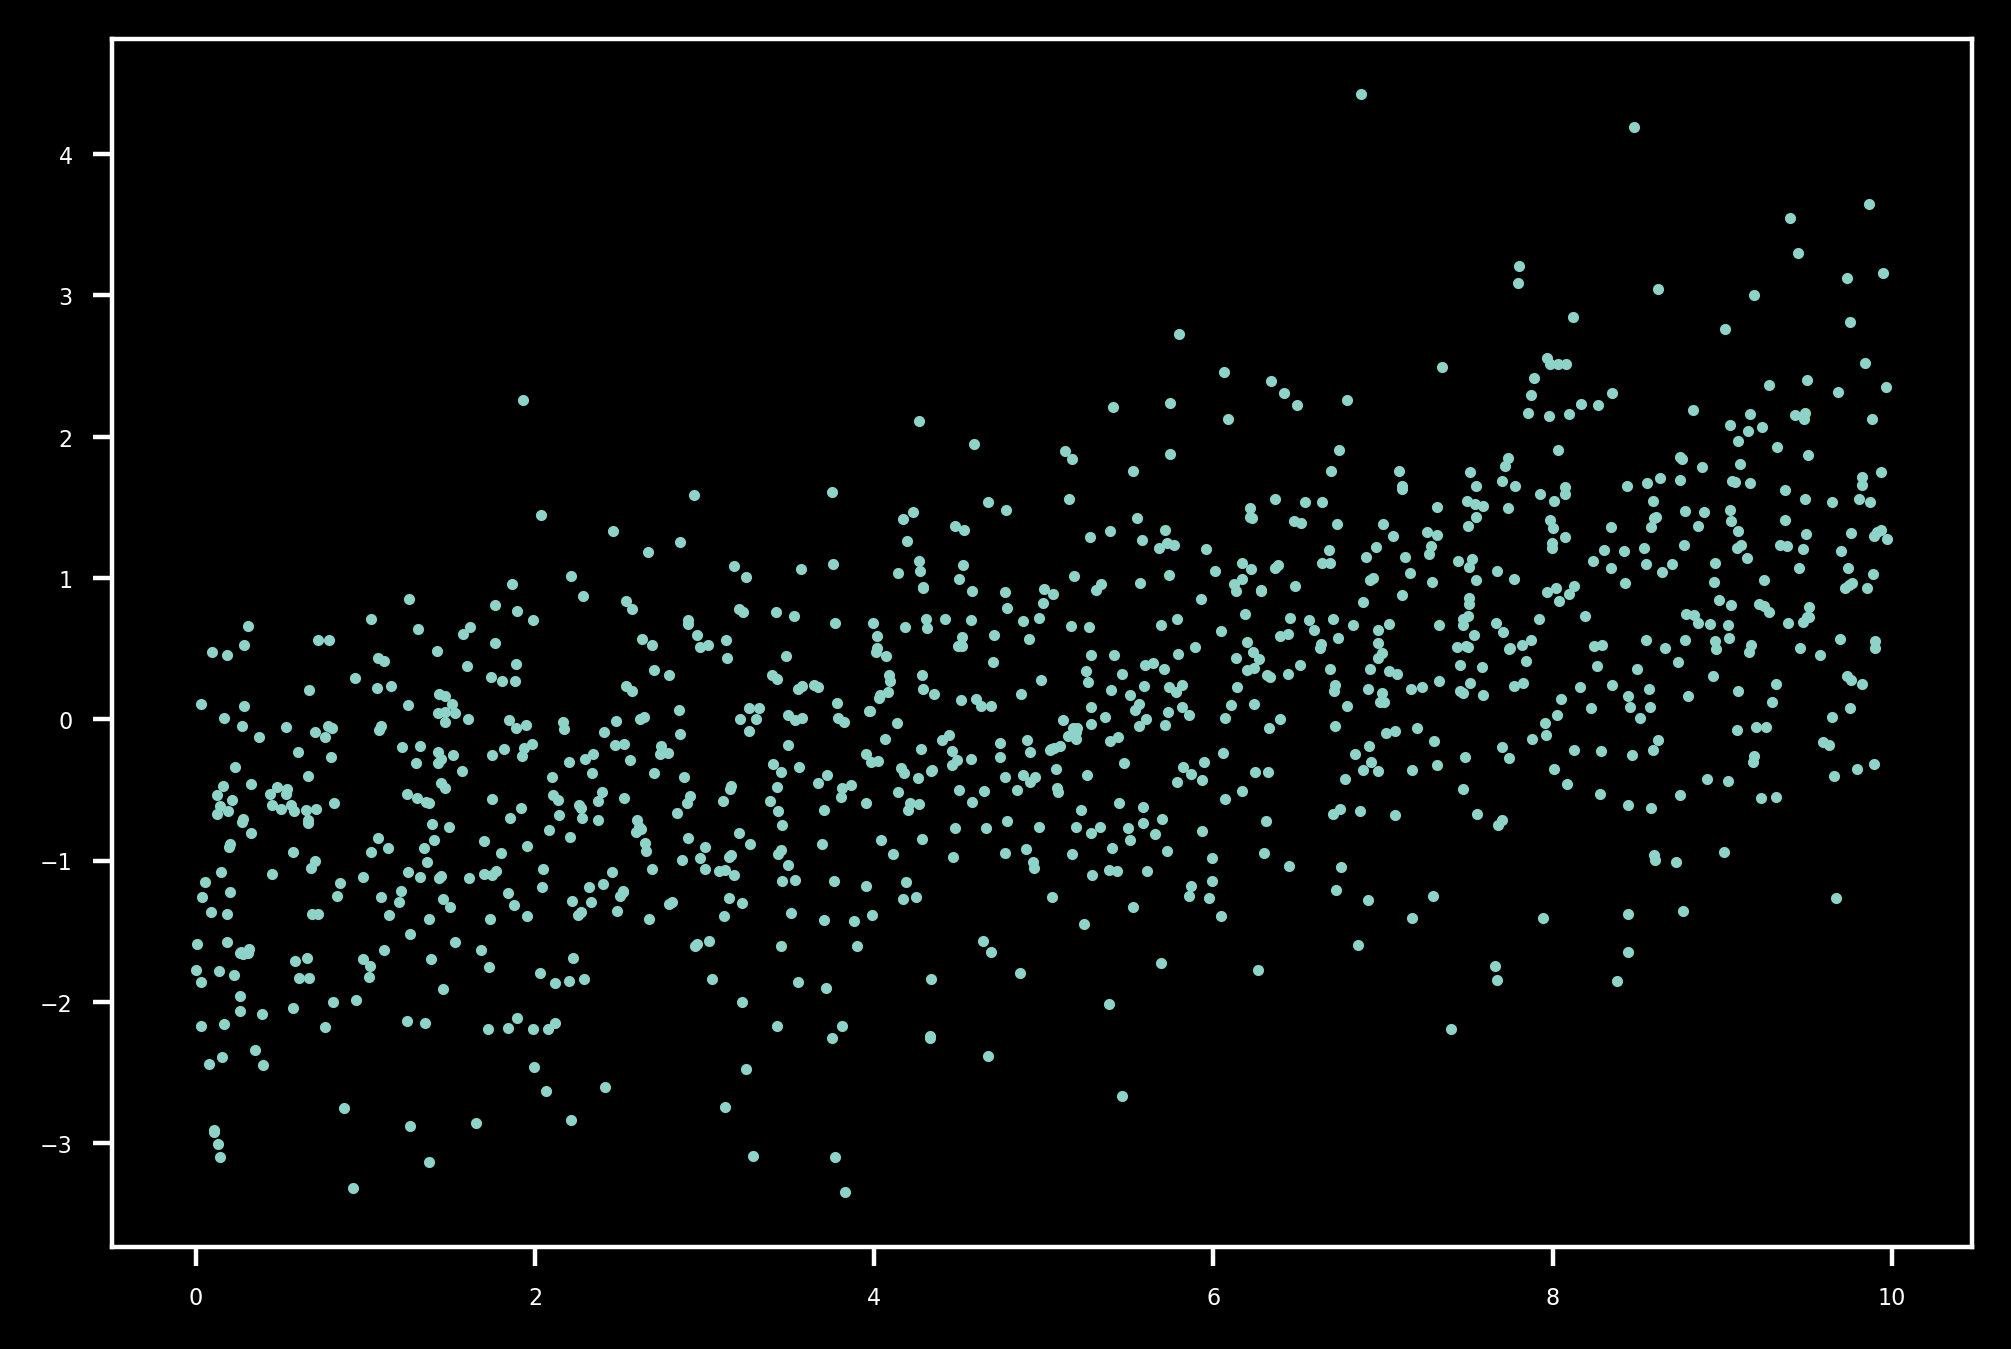

In [21]:
plt.scatter(X, y, s=1)

### Linear Regression in Scikit-Learn

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [24]:
#fitting the model
lin_reg.fit(X.reshape(-1,1),y)
print(lin_reg.intercept_)

-1.1612566002825881


In [26]:
print(lin_reg.coef_)

[0.24002588]


In [27]:
#making predictions
y_pred = lin_reg.predict(X.reshape(-1,1))

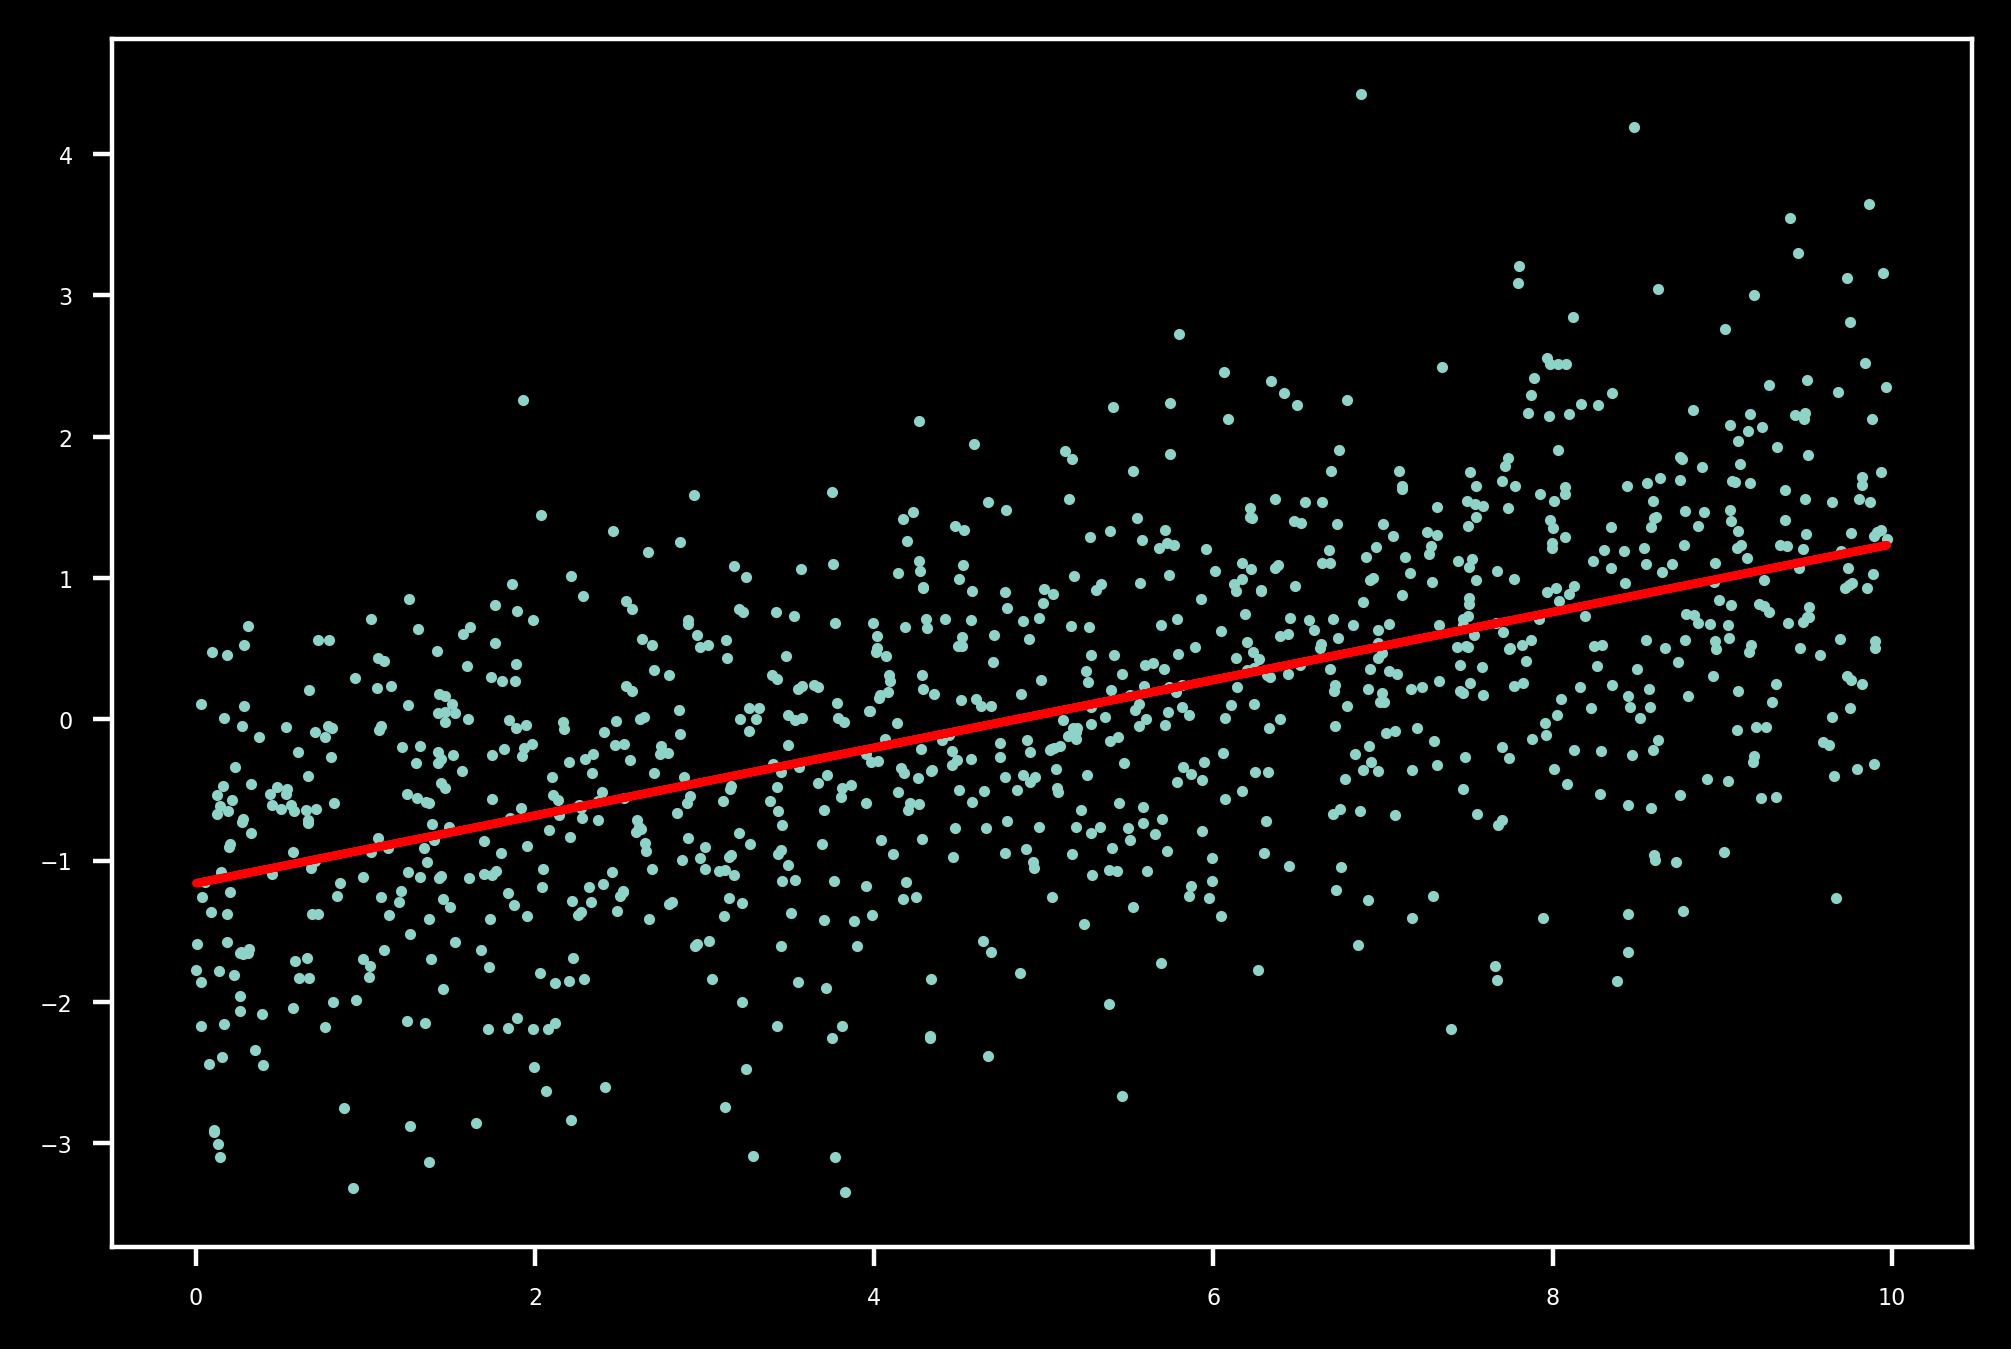

In [29]:
plt.scatter(X,y, s=1)
plt.plot(X,y_pred,'r')

### Splitting the data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [33]:
print(np.mean(y_train), np.mean(y_test))

0.223102526838873 0.21657603600225014


Note: If the positive class is very rare in our dataset to evenly split the data we can pass stratify argument in the train_test_split function, which will ensure that the train and test data gets the same fraction of data for each class. Here sampling will not be needed as the train set is representative of the test set

In [36]:
# fitting and example model
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [37]:
#training and predictions
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

In [38]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Testing metrics

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


_________________________________________________________________________
**Now, plot the ROC curve.**


_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

    How is this different, conceptually and quantitatively, from your earlier calculation?
